In [1]:
import math
import numpy as np
import random
import json
import traceback

%matplotlib inline 

class LinearRegression(object):
    def __init__(self, batch_size = 2, epochs = 1000, learning_rate = 0.01):
        """Linear Regression using mini batch gradient descent"""
        self.m = 0
        self.c = 0
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.error = 0.000000000001
        self.batch_size = batch_size
        self.__normalize_x_factor__ = {}
        self.__normalize_y_factor__ = {}
    
    @staticmethod
    def __normalize_data__(x, min, max):
        """normalize the data (x - xmin)/(xmax - xmin)
        where xmin is smallest possible value of x that model can support
        and xmax is largest possible value of x that model can support."""
        return (x - min)/(max - min)
    
    def __rescale_data__(self, x, y):
        """rescale the data using data normalization (x - xmin)/(xmax - xmin) and 
        updates the normalization factor for input and output"""
        
        self.__normalize_x_factor__['min'] = np.amin(x)
        self.__normalize_x_factor__['max'] = np.amax(x)
        self.__normalize_y_factor__['min'] = np.amin(y)
        self.__normalize_y_factor__['max'] = np.amax(y)

        x_scaled = LinearRegression.__normalize_data__(x,self.__normalize_x_factor__['min'], self.__normalize_x_factor__['max'])
        y_scaled = LinearRegression.__normalize_data__(y,self.__normalize_y_factor__['min'], self.__normalize_y_factor__['max'])
        return x_scaled, y_scaled
        
    def __randomize_mini_batch__(self, x, y):
        """randomizes the dataset and returns a randomize mini batch"""
        if self.batch_size == 0:
            raise ValueError('Invalid batch size, batch size should be greater than 0.')
        data = list(zip(x,y))
        random.shuffle(data)
        x , y = zip(*data)
        return np.array(x[0:self.batch_size]), np.array(y[0:self.batch_size])
    
    def __predict__scaled__(self, x):
        """makes prediction using learned model"""
        return self.m*x +self.c
    
    def predict(self, x):
        """makes prediction using learned model"""
        x_scaled = LinearRegression.__normalize_data__(x,self.__normalize_x_factor__['min'], self.__normalize_x_factor__['max'])
        y_predicted = self.__predict__scaled__(x_scaled)
        return (y_predicted * (self.__normalize_y_factor__['max'] - self.__normalize_y_factor__['min']))  + self.__normalize_y_factor__['min']
    
    def __compute_error__(self, y, y_predicted):
        """computes and returns MSE"""
        return np.sum((y - y_predicted)**2)/len(y)
    
    def __compute_gradient__(self, x, y):
        """computes the gradient descent for a single batch"""
        y_predicted = self.__predict__scaled__(x)
        #simultaneous updates for m and c
        delta_m = self.m - self.learning_rate * (np.sum((y - y_predicted ) * -x)/y.shape[0])
        delta_c = self.c - self.learning_rate * (np.sum((y - y_predicted ) * -1)/y.shape[0])
        self.m = delta_m
        self.c = delta_c
        error = self.__compute_error__(y,y_predicted)
        return self.m, self.c, error
    
    def fit(self, x, y):
        """fit the model using input data."""
        epoch_count = 0
        gradient_error = []
        gradient_m = []
        gradient_c = []
        
        #scaling data using normalization
        x_scaled, y_scaled = self.__rescale_data__( x , y)
        
        while self.epochs > epoch_count:
            a , b = self.__randomize_mini_batch__(x_scaled , y_scaled)
            m, c, error = self.__compute_gradient__(a,b)
            if (epoch_count == 0 and self.error >= error) or (len(gradient_error) > 0 and (gradient_error[-1] == error or gradient_error[-1] <= self.error)):
                break
            gradient_error.append(error)
            gradient_m.append(m)
            gradient_c.append(c)
            epoch_count+= 1
        self.error = gradient_error[-1]
        return gradient_m, gradient_c, gradient_error
    
    def save(self, model_location):
        """saves the learnt model on disk."""
        try:
            with open(model_location, 'w') as model_file:
                json.dump(self.__dict__,model_file)
        except:
            traceback.print_exc()
            print('error saving the model.')
        else:
            print('model saved sucessfully.')
    
    @staticmethod
    def load(model_location):
        """loads linear regression model from the disk."""
        try:
            with open(model_location, 'r') as model_file:
                linear_regression_dict = json.load(model_file)
                lr = LinearRegression()
                lr.__dict__ = linear_regression_dict
        except:
            traceback.print_exc()
            print('error loading the model.')
        else:
            print('model loaded sucessfully.')
            return lr
    
    def __repr__(self):
        """string repersentation of the Linear Regression Object."""
        return json.dumps(self.__dict__)

In [2]:
help(LinearRegression)

Help on class LinearRegression in module __main__:

class LinearRegression(builtins.object)
 |  Methods defined here:
 |  
 |  __compute_error__(self, y, y_predicted)
 |      computes and returns MSE
 |  
 |  __compute_gradient__(self, x, y)
 |      computes the gradient descent for a single batch
 |  
 |  __init__(self, batch_size=2, epochs=1000, learning_rate=0.01)
 |      Linear Regression using mini batch gradient descent
 |  
 |  __predict__scaled__(self, x)
 |      makes prediction using learned model
 |  
 |  __randomize_mini_batch__(self, x, y)
 |      randomizes the dataset and returns a randomize mini batch
 |  
 |  __repr__(self)
 |      string repersentation of the Linear Regression Object.
 |  
 |  __rescale_data__(self, x, y)
 |      rescale the data using data normalization (x - xmin)/(xmax - xmin) and 
 |      updates the normalization factor for input and output
 |  
 |  fit(self, x, y)
 |      fit the model using input data.
 |  
 |  predict(self, x)
 |      makes pre

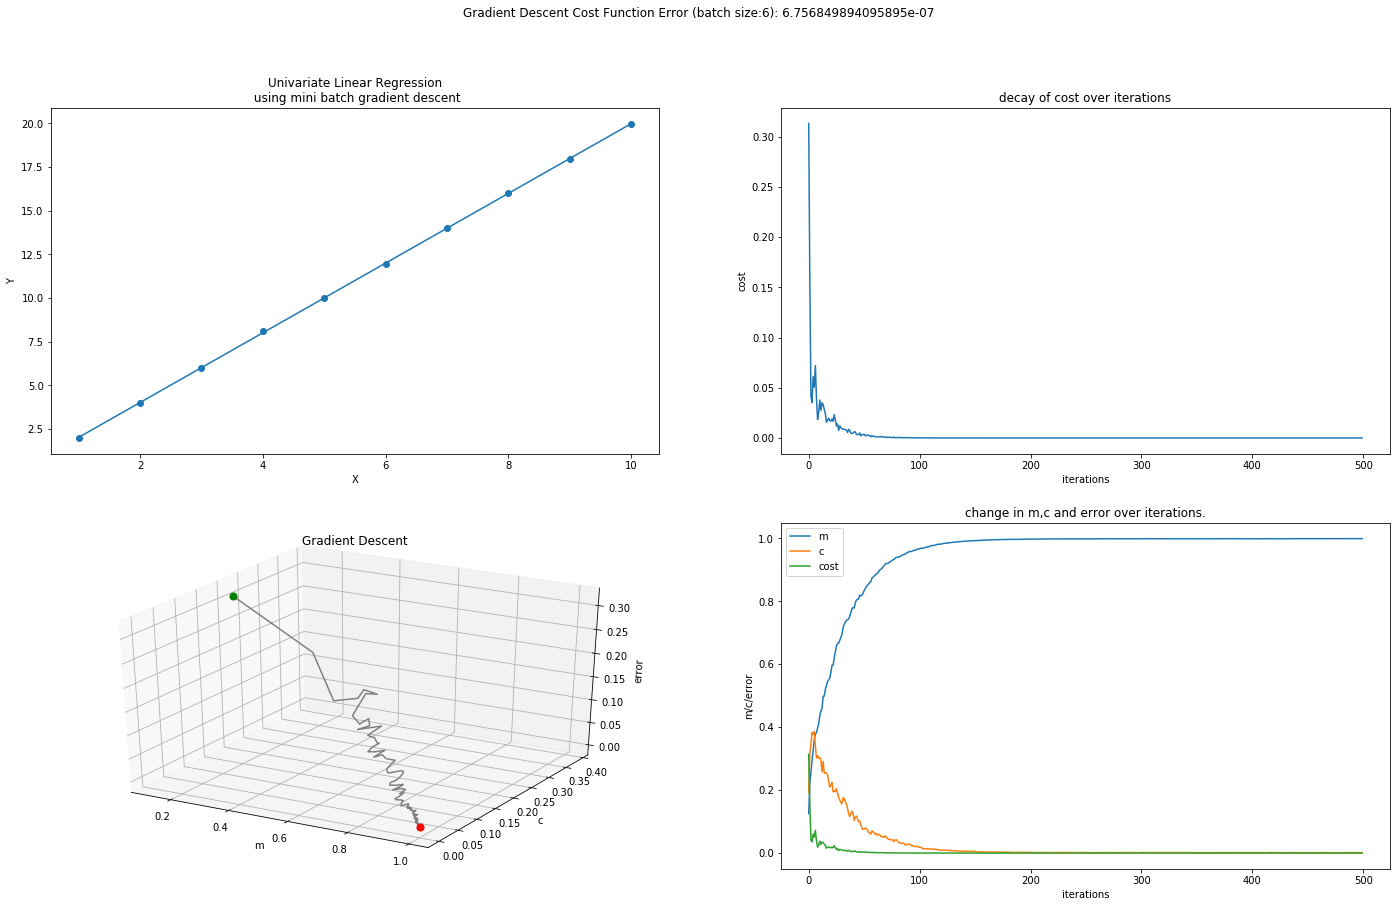

In [3]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline 

a = np.array([1,2,3,4,5,6,7,8,9,10])
b = np.array([2,4,6.01,8.10,10,11.96,14.01,16,17.97,19.98])
lr = LinearRegression(batch_size=6 , epochs = 500, learning_rate=0.4)
m, c, gradient_error  = lr.fit(a,b)

fig = plt.figure()
fig.suptitle('Gradient Descent Cost Function Error (batch size:'+str(lr.batch_size)+'): '+str(lr.error))
fig.set_size_inches(24, 14)
fig.tight_layout(pad=0.4, w_pad=6.5, h_pad=1.0)
ax = fig.add_subplot(221)
ax.scatter(a, b)
ax.plot(a, lr.predict(a))
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Univariate Linear Regression\n using mini batch gradient descent')

i = np.arange(0, len (gradient_error)).tolist()
ax = fig.add_subplot(222)
ax.plot(i, gradient_error)
ax.set_xlabel('iterations')
ax.set_ylabel('cost')
ax.set_title('decay of cost over iterations')

ax = fig.add_subplot(223, projection='3d')
ax.plot3D(m, c, gradient_error, 'grey')
ax.scatter(m[0],c[0],gradient_error[0],c=['g'], s=50.0)
ax.scatter(m[-1],c[-1],gradient_error[-1],c=['r'], s=50.0)
ax.set_xlabel('m')
ax.set_ylabel('c')
ax.set_zlabel('error')
ax.set_title('Gradient Descent')

itr = np.arange(len(m))
ax = fig.add_subplot(224)
ax.plot(itr,m,label='m')
ax.plot(itr,c,label='c')
ax.plot(itr,gradient_error,label='cost')
ax.legend()
ax.set_xlabel('iterations')
ax.set_ylabel('m/c/error')
ax.set_title('change in m,c and error over iterations.')
plt.show()

In [4]:
import pandas as pd
df = pd.read_csv('data.csv', header = None)
df.head()

,0,1
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [5]:
df.describe()

,0,1
count,100.000000,100.000000
mean,48.958341,72.735051
std,9.746379,16.658187
min,25.128485,31.707006
25%,41.526164,60.788586
50%,49.634970,72.179542
75%,56.762631,83.215080
max,70.346076,118.591217


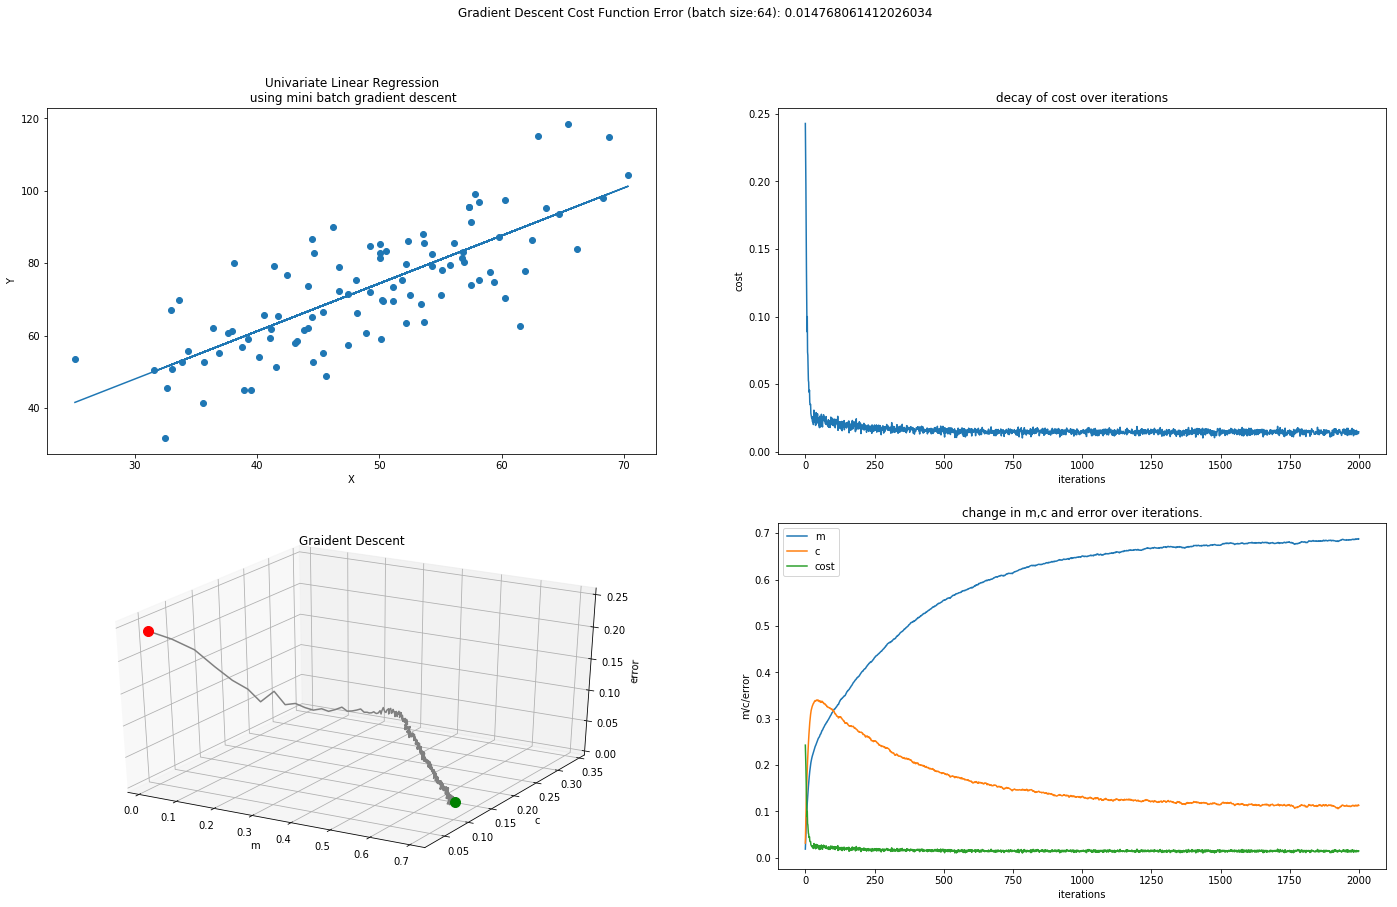

In [6]:
x = df.iloc[:,0].values
y = df.iloc[:,1].values
lr = LinearRegression(batch_size = 64, epochs = 2000, learning_rate = 0.07)
m, c, gradient_error  = lr.fit(x,y)

fig = plt.figure()
fig.suptitle('Gradient Descent Cost Function Error (batch size:'+str(lr.batch_size)+'): '+str(lr.error))
fig.set_size_inches(24, 14)
fig.tight_layout(pad=0.4, w_pad=6.5, h_pad=1.0)
ax = fig.add_subplot(221)
ax.scatter(x, y)
ax.plot(x, lr.predict(x))
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Univariate Linear Regression\n using mini batch gradient descent')

ax = fig.add_subplot(222)
i = np.arange(0, len (gradient_error)).tolist()
ax.plot(i, gradient_error)
ax.set_xlabel('iterations')
ax.set_ylabel('cost')
ax.set_title('decay of cost over iterations')

ax = fig.add_subplot(223, projection = '3d')
ax.plot3D(m, c, gradient_error, 'grey')
ax.scatter3D(m[0],c[0],gradient_error[0], c ='r', s=100.0)
ax.scatter3D(m[-1],c[-1],gradient_error[-1], c = ['g'], s=100.0)
ax.set_xlabel('m')
ax.set_ylabel('c')
ax.set_zlabel('error')
ax.set_title('Graident Descent')

itr = np.arange(len(m))
ax = fig.add_subplot(224)
ax.plot(itr,m,label='m')
ax.plot(itr,c,label='c')
ax.plot(itr,gradient_error,label='cost')
ax.legend()
ax.set_xlabel('iterations')
ax.set_ylabel('m/c/error')
ax.set_title('change in m,c and error over iterations.')
plt.show()